In [101]:
! gdown 14DoImQQ3OHZKgqmKwtBO8qysiZ3lTc1T           #M&M
! gdown 1-NQRpLjmTJQsuM9l48wuOHHReqC1GCRA           #HDFC
! gdown 1S0-qi3Zb3q_jq4YoboPNYdw2O3-1ZJSs           #VADILALIND
! gdown 1eBU6SCbINZiXXJDk4b6CZn8ii8IbgvkX           #IOC
! gdown 1iOGEPs-ySJ00KGrxkJT8QgX7E2_v4dqg           #JPPOWER

Downloading...
From: https://drive.google.com/uc?id=14DoImQQ3OHZKgqmKwtBO8qysiZ3lTc1T
To: /content/20-04-2022-TO-20-04-2023-M&M-EQ-N.csv
100% 26.0k/26.0k [00:00<00:00, 66.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-NQRpLjmTJQsuM9l48wuOHHReqC1GCRA
To: /content/20-04-2022-TO-20-04-2023-HDFC-EQ-N.csv
100% 26.4k/26.4k [00:00<00:00, 76.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1S0-qi3Zb3q_jq4YoboPNYdw2O3-1ZJSs
To: /content/20-04-2022-TO-20-04-2023-VADILALIND-EQ-N.csv
100% 26.0k/26.0k [00:00<00:00, 73.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eBU6SCbINZiXXJDk4b6CZn8ii8IbgvkX
To: /content/20-04-2022-TO-20-04-2023-IOC-EQ-N.csv
100% 23.8k/23.8k [00:00<00:00, 40.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1iOGEPs-ySJ00KGrxkJT8QgX7E2_v4dqg
To: /content/20-04-2022-TO-20-04-2023-JPPOWER-EQ-N.csv
100% 23.3k/23.3k [00:00<00:00, 43.4MB/s]


In [102]:
import math
import datetime 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler

import keras 
from keras import models
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [103]:
df1=pd.read_csv('20-04-2022-TO-20-04-2023-M&M-EQ-N.csv')
df2=pd.read_csv('20-04-2022-TO-20-04-2023-HDFC-EQ-N.csv')
df3=pd.read_csv('20-04-2022-TO-20-04-2023-VADILALIND-EQ-N.csv')
df4=pd.read_csv('20-04-2022-TO-20-04-2023-IOC-EQ-N.csv')
df5=pd.read_csv('20-04-2022-TO-20-04-2023-JPPOWER-EQ-N.csv')

In [104]:
df_list=[df1,df2,df3,df4,df5]
data=[None]*len(df_list)            #Creating lists with size the same as that of df_list
dataset=[None]*len(df_list)
scaled_data=[None]*len(df_list)
training_data_len=[None]*len(df_list)
train_data=[None]*len(df_list)
test_data=[None]*len(df_list)
x_train=[]
y_train=[]
x_test=[]
y_test=[]
predictions=[]

#Create a list of empty lists
num_lists = len(df_list)

# Create empty lists using a for loop
for _ in range(num_lists):
    empty_list = []
    x_train.append(empty_list)
    

for _ in range(num_lists):
    empty_list = []
    y_train.append(empty_list)

for _ in range(num_lists):
    empty_list = []
    x_test.append(empty_list)

for _ in range(num_lists):
    empty_list = []
    y_test.append(empty_list)

for _ in range(num_lists):
    empty_list = []
    predictions.append(empty_list)


Cleaner function

In [105]:
#Function to change the index of dataframe to date
def chng_index(df):
  dt_li=[]
  for i in df.index:
    dt_li.append(datetime.datetime.strptime(df['Date  '][i],'%d-%m-%Y').date())
  
  df.index=dt_li

In [106]:
#Function to plot the data
def plotter(df):
  plt.figure(figsize=(16,8))
  plt.title('Close price history')
  plt.plot(df.index,df['Close Price  '])
  plt.xlabel('Date',fontsize=18)
  plt.ylabel('Close price '+df['Symbol  '][1],fontsize=18)
  plt.show()

In [ ]:
len(x_train[0])

0

In [ ]:
scaled_data[4]

In [107]:
#Function to extract the 'Close Price Column of the dataframes and scale the datasets
def extract(df,i):
  data[i]=df['Close Price  ']
  #convert the data into numpy array 
  dataset[i]=data[i].values
  dataset[i]=dataset[i].reshape(-1,1)
  scaler=MinMaxScaler(feature_range=(0,1))
  scaled_data[i]=scaler.fit_transform(dataset[i])




In [108]:
#Fuction to split the x training dataset 
def split_x_train(var):
  training_data_len[var]=math.ceil(len(dataset[var])*0.8)
  train_data[var]=scaled_data[var][0:training_data_len[var],:]

  #Splitting into x train and y train
  #x train will have the sets data values i.e. the past 60 days data divided into sets of (0,59), (1,60), (2,61) etc.
  #y train will have the target values, for each set the target value is the closing price of the next day, i.e. for x_train (0,59) the target will be the closing price of 60th day. 
  for j in range(60, len(train_data[var])):
    x_train[var].append(train_data[var][j-60:j,0])
    


In [109]:
#Fuction to split the y training dataset 
def split_y_train(var):
  for j in range(60, len(train_data[var])):
    y_train[var].append(train_data[var][j,0])

In [110]:
def convert(i):
  #currently x_train and y_train are simply lists, so we convert them to numpy arrays
  x_train[i], y_train[i]=np.array(x_train[i]), np.array(y_train[i])

In [111]:
def re_shp(i) :
  x_train[i]=np.reshape(x_train[i],(x_train[i].shape[0],x_train[i].shape[1],1))

  #For i=0, this statement is equivalent to np.reshape(x_train,(134,60,1))   134 instances, 60 features
  #LSTMs expect a 3D input

In [112]:
#Fuction to split the x testing dataset 
def split_x_test(i):
  test_data[i]=scaled_data[i][training_data_len[i]-60:,:]
  for j in range(60, len(test_data[i])):
   x_test[i].append(test_data[i][j-60:j,0])


In [113]:
def split_y_test(i):
  y_test[i]=dataset[i][training_data_len[i]:, :]
  

In [114]:
def conv_x_test(i):
#Convert test data set to numpy array
  x_test[i]=np.array(x_test[i])
#Reshape the data
  x_test[i]=np.reshape(x_test[i],(x_test[i].shape[0],x_test[i].shape[1],1))

In [115]:
def scale(i):
  scaler=MinMaxScaler(feature_range=(0,1))
  scaled_data[i]=scaler.fit_transform(dataset[i])
  predictions[i]=scaler.inverse_transform(predictions[i])

In [116]:
def cleaning(listt):
  for i in range (0,5):
    if not(listt[i].isnull().values.any()):
      chng_index(listt[i])
      # # plotter(listt[i])
      extract(listt[i],i)
      split_x_train(i)
      split_y_train(i)
      convert(i)
      re_shp(i)
      split_x_test(i)
      split_y_test(i)
      conv_x_test(i)
      #scale(i)

In [117]:
cleaning(df_list)

In [118]:
print(x_train[0].shape,"\n",y_train[0].shape)

(134, 60, 1) 
 (134,)


In [119]:
x_train[0]

array([[[0.03060736],
        [0.08751793],
        [0.105978  ],
        ...,
        [0.53065519],
        [0.58775705],
        [0.57034912]],

       [[0.08751793],
        [0.105978  ],
        [0.07412721],
        ...,
        [0.58775705],
        [0.57034912],
        [0.61406026]],

       [[0.105978  ],
        [0.07412721],
        [0.14328073],
        ...,
        [0.57034912],
        [0.61406026],
        [0.57465328]],

       ...,

       [[0.90349115],
        [0.82821616],
        [0.80698231],
        ...,
        [0.89210904],
        [0.98230512],
        [0.93122908]],

       [[0.82821616],
        [0.80698231],
        [0.78986131],
        ...,
        [0.98230512],
        [0.93122908],
        [0.93189861]],

       [[0.80698231],
        [0.78986131],
        [0.81578192],
        ...,
        [0.93122908],
        [0.93189861],
        [1.        ]]])

In [120]:
model1= load_model('M&M.h5')

In [121]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Testing the model on the stock it was trained on
predictions[0]=model1.predict(x_test[0])
scale(0)
# predictions[0]=scaler.inverse_transform(predictions[0])

2/2 [==============================] - 0s 25ms/step


In [122]:
#Transfer learning for HDFC Stock 
model2_on_1=keras.models.Sequential(model1.layers[:-1])
model2_on_1.add(Dense(1))


In [123]:
#Cloning the model1
model1_clone = keras.models.clone_model(model1) 
model1_clone.set_weights(model1.get_weights())

In [128]:
#Freezing the new models layers
for layer in model2_on_1.layers[:-1]: 
  layer.trainable = True

optimizer=keras.optimizers.Adam(lr=1e-4)
model2_on_1.compile(optimizer=optimizer, loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [132]:
model2_on_1.fit(x_train[1], y_train[1], batch_size=1, epochs=15)

Epoch 1/15
134/134 [==============================] - 5s 35ms/step - loss: 0.0025
Epoch 2/15
134/134 [==============================] - 4s 31ms/step - loss: 0.0023
Epoch 3/15
134/134 [==============================] - 4s 33ms/step - loss: 0.0023
Epoch 4/15
134/134 [==============================] - 4s 29ms/step - loss: 0.0023
Epoch 5/15
134/134 [==============================] - 4s 30ms/step - loss: 0.0023
Epoch 6/15
134/134 [==============================] - 5s 35ms/step - loss: 0.0023
Epoch 7/15
134/134 [==============================] - 4s 28ms/step - loss: 0.0023
Epoch 8/15
134/134 [==============================] - 4s 29ms/step - loss: 0.0023
Epoch 9/15
134/134 [==============================] - 5s 36ms/step - loss: 0.0023
Epoch 10/15
134/134 [==============================] - 4s 29ms/step - loss: 0.0022
Epoch 11/15
134/134 [==============================] - 4s 29ms/step - loss: 0.0023
Epoch 12/15
134/134 [==============================] - 5s 37ms/step - loss: 0.0022
Epoch 13/15
1

In [133]:
predictions[1]=model2_on_1.predict(x_test[1])
scale(1)

2/2 [==============================] - 0s 48ms/step


In [134]:
rmse=np.sqrt(np.mean(predictions[1]-y_test[1])**2)
rmse

4.328192138671862

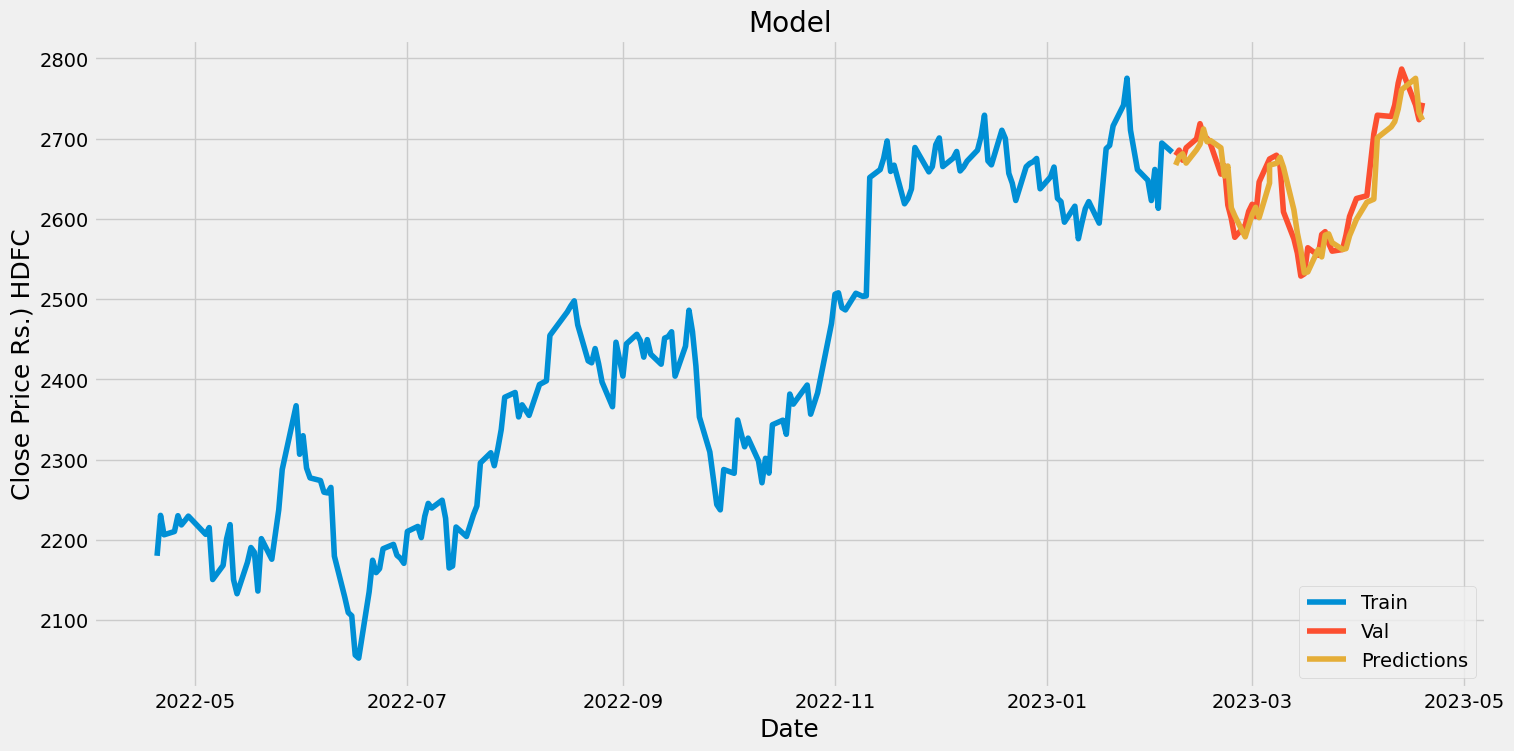

In [141]:
train=data[1][:training_data_len[1]]
valid=data[1][training_data_len[1]:]
valid=valid.to_frame(name='Close Price')
valid['Predictions']=predictions[1]
#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price Rs.) HDFC', fontsize=18)
# plt.plot(train['Close Price '])
plt.plot(train) 
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [142]:
model2_on_1.save('HDFC.h5')

In [172]:
#Transfer learning for Vadilal Stock 
model3_on_1=keras.models.Sequential(model1.layers[:-1])
model3_on_1.add(Dense(1))


In [177]:
for layer in model3_on_1.layers[:-1]: 
  layer.trainable = True

optimizer=keras.optimizers.Adam(lr=1e-4)
model3_on_1.compile(optimizer=optimizer, loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [178]:
model3_on_1.fit(x_train[2], y_train[2], batch_size=1, epochs=100)

Epoch 1/100
133/133 [==============================] - 7s 30ms/step - loss: 0.0901
Epoch 2/100
133/133 [==============================] - 5s 35ms/step - loss: 0.0050
Epoch 3/100
133/133 [==============================] - 4s 30ms/step - loss: 0.0039
Epoch 4/100
133/133 [==============================] - 4s 29ms/step - loss: 0.0035
Epoch 5/100
133/133 [==============================] - 5s 36ms/step - loss: 0.0031
Epoch 6/100
133/133 [==============================] - 4s 31ms/step - loss: 0.0029
Epoch 7/100
133/133 [==============================] - 4s 29ms/step - loss: 0.0029
Epoch 8/100
133/133 [==============================] - 4s 34ms/step - loss: 0.0028
Epoch 9/100
133/133 [==============================] - 4s 32ms/step - loss: 0.0028
Epoch 10/100
133/133 [==============================] - 4s 28ms/step - loss: 0.0026
Epoch 11/100
133/133 [==============================] - 5s 34ms/step - loss: 0.0027
Epoch 12/100
133/133 [==============================] - 4s 34ms/step - loss: 0.0026
E

In [179]:
predictions[2]=model3_on_1.predict(x_test[2])
scale(2)

2/2 [==============================] - 1s 25ms/step


In [176]:
rmse=np.sqrt(np.mean(predictions[2]-y_test[2])**2)
rmse
#Initial error after unfreezinmg just the o/p layer 

654.5575449625651

In [180]:
rmse=np.sqrt(np.mean(predictions[2]-y_test[2])**2)
rmse

23.35706431070965

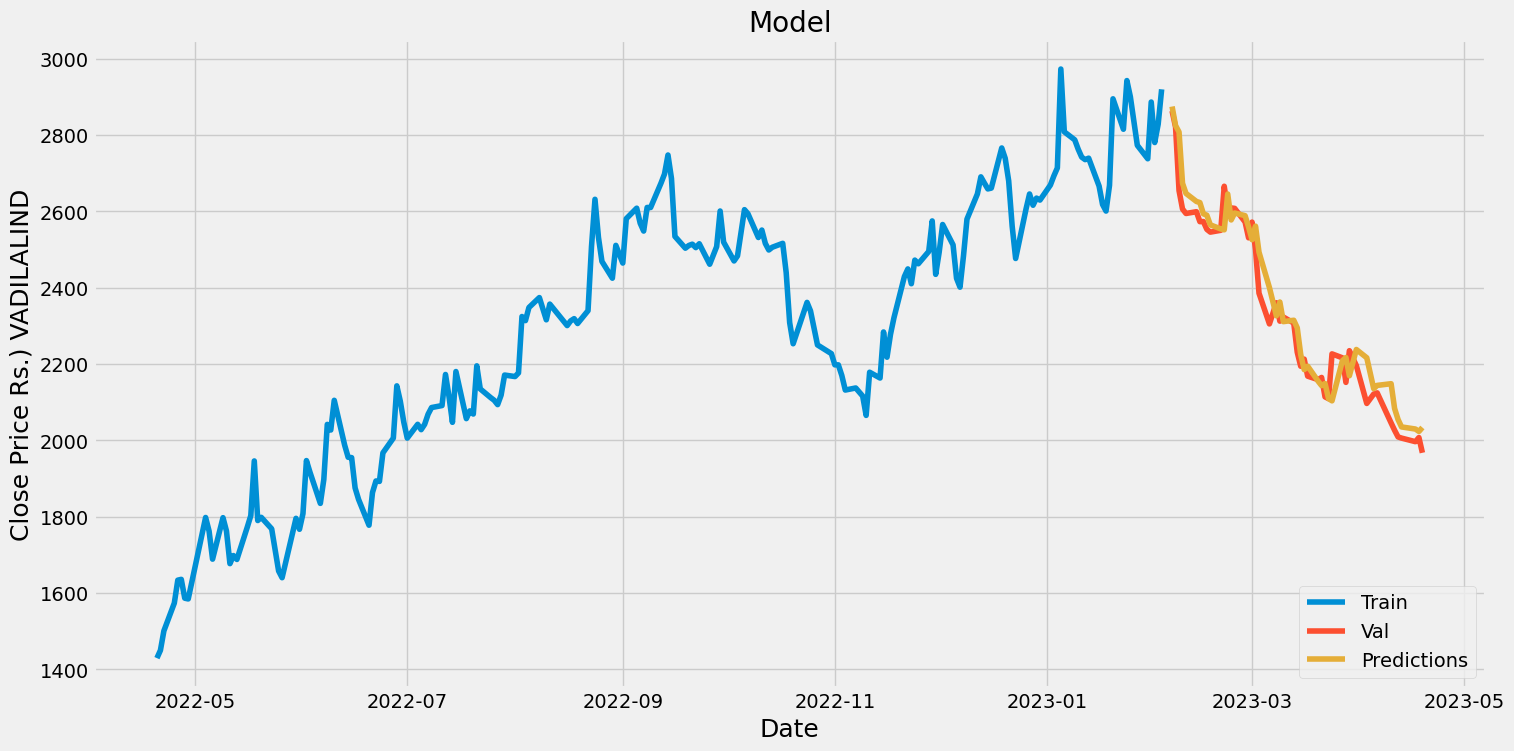

In [181]:
train=data[2][:training_data_len[2]]
valid=data[2][training_data_len[2]:]
valid=valid.to_frame(name='Close Price')
valid['Predictions']=predictions[2]
#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price Rs.) VADILALIND', fontsize=18)
# plt.plot(train['Close Price '])
plt.plot(train) 
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [182]:
valid

,Close Price,Predictions
2023-02-06,2863.70,2875.129639
2023-02-07,2821.20,2825.170654
2023-02-08,2654.75,2808.246094
2023-02-09,2606.55,2673.927246
2023-02-10,2594.80,2647.400391
2023-02-13,2599.45,2626.364746
2023-02-14,2573.40,2623.322754
2023-02-15,2573.65,2593.963623
2023-02-16,2553.20,2590.196045
2023-02-17,2545.95,2565.001221


In [183]:
model3_on_1.save('VADILALIND.h5')